<bold>This is it. You have seen how to define neural networks, compute loss and make updates to the weights of the network.

Now you might be thinking,

What about data?
Generally, when you have to deal with image, text, audio or video data, you can use standard python packages that load data into a numpy array. Then you can convert this array into a torch.*Tensor.

For images, packages such as Pillow, OpenCV are useful
For audio, packages such as scipy and librosa
For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful
Specifically for vision, we have created a package called torchvision, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., torchvision.datasets and torch.utils.data.DataLoader.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

cifar10
cifar10

Training an image classifier
We will do the following steps in order:

Load and normalizing the CIFAR10 training and test datasets using torchvision
Define a Convolutional Neural Network
Define a loss function
Train the network on the training data
Test the network on the test data</bold>

### Loading and normalization CIFAR10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((.5,.5,.5), (.5,.5,.5))])
train_set = torchvision.datasets.CIFAR10(root="./data/", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)
test_set = torchvision.datasets.CIFAR10(root="./data/",train=False,download=True, transform=transform)
testloader =torch.utils.data.DataLoader(test_set, batch_size=4, shuffle=True, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


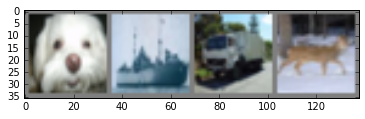

  dog  ship truck  deer


In [6]:
# train
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#show one image
def imshow(img):
    img = img/2.0 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
#get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
#show images
imshow(torchvision.utils.make_grid(images))
#print labels
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

In [7]:
labels

tensor([5, 8, 9, 4])

In [8]:
# Define a CNN
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [9]:
#loss and optimizer
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=.001, momentum=.9)

In [ ]:
#train
for epoch in range(2):